### 1. обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете fashion-mnist
### 3. оценить рост точности при увеличении глубины сети (больше слоев)
### 4. сравнить с точностью полносвязной сети для этой выборки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist
#from keras.utils import plot_model
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
from sklearn.metrics import confusion_matrix

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, Flatten, Concatenate
from tensorflow.keras.utils import plot_model

In [ ]:
# загружаем данные
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)  
print(train_labels.shape) 
print(test_images.shape)   
print(test_labels.shape) 

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# конвертация чисел из uint8 в float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# нормализация данных [0, 1]
train_images /= 255 
test_images /= 255 

# трансформация лейблов в one-hot encoding
train_labels = to_categorical(train_labels, 10) 
test_labels = to_categorical(test_labels, 10) 

# изменение размерности массива в 4D массив
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

In [ ]:
# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
model.add(layers.Flatten())

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model.fit(x=train_images,y=train_labels, epochs=5, batch_size=254, validation_data=(test_images, test_labels), verbose=1)

test_score = model.evaluate(test_images, test_labels)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
237/237 [==============================] - 81s 338ms/step - loss: 1.5714 - accuracy: 0.4886 - val_loss: 0.8214 - val_accuracy: 0.7069
Epoch 2/5
237/237 [==============================] - 80s 336ms/step - loss: 0.7566 - accuracy: 0.7226 - val_loss: 0.6924 - val_accuracy: 0.7456
Epoch 3/5
237/237 [==============================] - 80s 338ms/step - loss: 0.6520 - accuracy: 0.7580 - val_loss: 0.6427 - val_accuracy: 0.7650
Epoch 4/5
237/237 [==============================] - 80s 338ms/step - loss: 0.5987 - accuracy: 0.7804 - val_loss: 0.6075 - val_accuracy: 0.7773
Epoch 5/5
313/313 [==============================] - 6s 19ms/step - loss: 0.5794 - accuracy: 0.7866
Test loss 0.5794, accuracy 78.66%


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 5880)              0         
_________________________________________________________________
dense (Dense)                (None, 84)                4

In [ ]:
y_pred=model.predict(test_images)


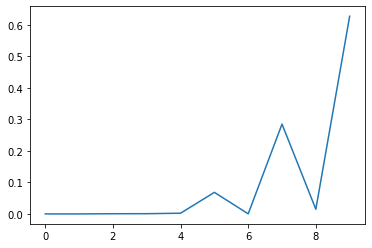

[8.6257263e-05 8.4168445e-05 6.8213843e-04 8.0809690e-04 2.3329321e-03
 6.8478167e-02 3.4665343e-04 2.8505459e-01 1.4940133e-02 6.2718683e-01]


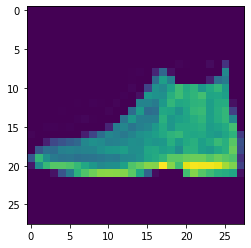

In [ ]:
plt.plot(y_pred[0][:])
plt.show()
print(y_pred[0][:])
plt.imshow(test_images[0][:,:,0])
plt.show()

### 2. оценить рост точности при увеличении ширины сети (больше ядер)


In [1]:
epochs = 5
epoch = np.arange(epochs+1)

plt.figure(figsize=(16,7))

for kernels in (1, 2, 4, 8, 16, 32, 64):

  # build
  model = Sequential([
      Conv2D(kernels, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding='same'),
      AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
      Conv2D(kernels, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
      AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
      Conv2D(kernels, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
      Flatten(),
      Dense(84, activation='tanh'),
      Dense(10, activation='softmax')
  ])

  # compile
  model.compile(loss=keras.losses.categorical_crossentropy, 
                optimizer='SGD', 
                metrics=["accuracy"])

  # calc errors
  test_score = model.evaluate(test_images, test_labels)
  print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

  # fitting
  hist = model.fit(x=train_images,y=train_labels, epochs=5, batch_size=254, validation_data=(test_images, test_labels), verbose=0)
  
  hist2 = model.evaluate(train_images, y_train, verbose=0)
  h_test = model.evaluate(test_images, y_test, verbose=0)

  print(f"{kernels} accuracy:")
  print(f"\tTrain: {hist2[1]}")
  print(f"\tTest: {h_test[1]}")

  plt.plot(epoch, [test_score[0]] + hist.history['loss'], label=f'{kernels} kernels')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.xlabel('log(loss)')
plt.show()

NameError: ignored